# Script to make batch statistics of the conflict task runs

In [1]:
from scipy.io import loadmat
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import os
import re

from Functions.Features import Features, FeaturePlotter, FeatureComparator

In [2]:
# List all files in the directory
data_dir = './Data/CompleteData/Test_run'
files = os.listdir(data_dir)

# Filter out the .mat files
mat_files = [file for file in files if file.endswith('.mat')]

print(mat_files)

['Jul_13_Run1.mat', 'Jul_13_Run2.mat']


In [3]:
# Load the .mat files
dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
for file in mat_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in dataset:
        dataset[code] = dict()
    if run not in dataset[code]:
        dataset[code][run] = dict()
    
    data = loadmat(os.path.join(data_dir, file))

    dataset[code][run] = data

    dataset[code][run]['test_type'] = dataset[code][run]['test_type'][dataset[code][run]['test_type'] != 0]

print(dataset.keys())
print(next(iter(dataset.values())).keys())
print(dataset['Jul_13']['1']['correct_nbr'].flatten())

dict_keys(['Jul_13'])
dict_keys(['1', '2'])
[214]


--------------------
Single run features
--------------------
Subject: Jul_13
	Run 1:
		Test type 1:
			mean: 329.143 ms
			median: 302 ms
			std: 83.1072 ms
			min: 214 ms
			max: 655.501 ms
			normality: No
		Test type 2:
			mean: 360.944 ms
			median: 348 ms
			std: 76.6767 ms
			min: 266.5 ms
			max: 617.501 ms
			normality: No
		Test type 3:
			mean: 325.704 ms
			median: 308.5 ms
			std: 68.8285 ms
			min: 216.5 ms
			max: 565.001 ms
			normality: No
		Test type 4:
			mean: 319.98 ms
			median: 294.5 ms
			std: 79.3702 ms
			min: 215 ms
			max: 611.501 ms
			normality: No
		Heterotopic over homotopic ratio: 1.0707
	Run 2:
		Test type 1:
			mean: 296.145 ms
			median: 286 ms
			std: 55.5404 ms
			min: 209.5 ms
			max: 429.5 ms
			normality: No
		Test type 2:
			mean: 305.041 ms
			median: 303.5 ms
			std: 41.4601 ms
			min: 224.5 ms
			max: 375 ms
			normality: Yes
		Test type 3:
			mean: 277.256 ms
			median: 268.5 ms
			std: 52.7842 ms
			min: 212.5 ms
			max: 431.5 ms
			normal

<Figure size 1000x800 with 0 Axes>

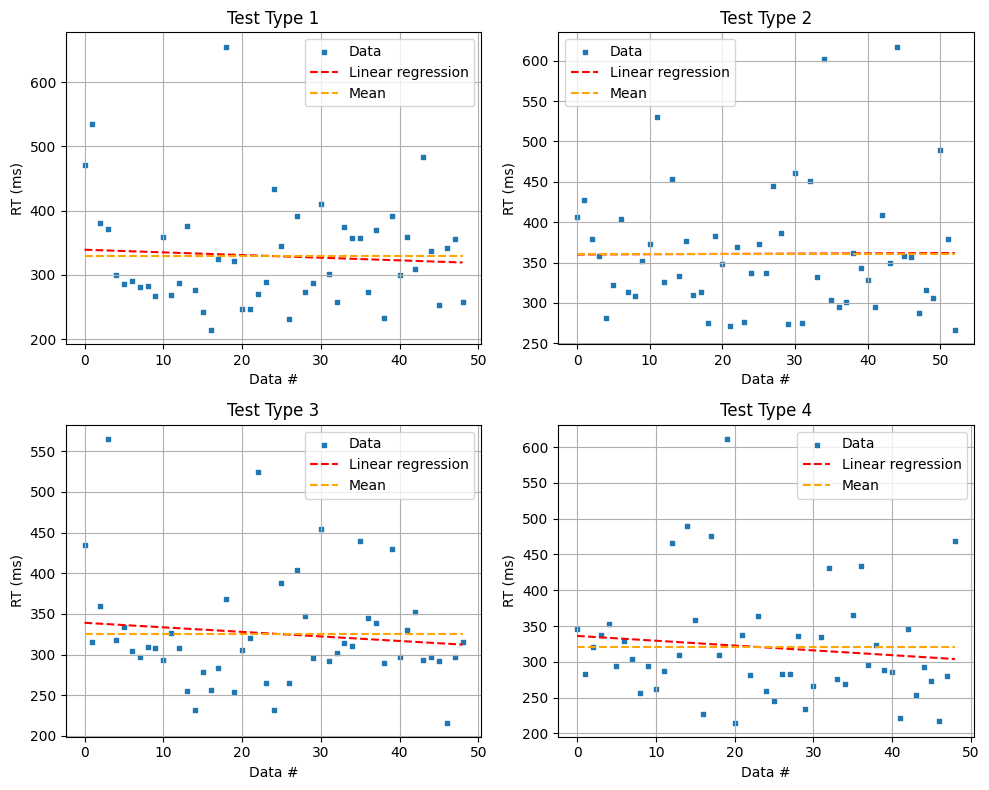

Subject: Jul_13, Run: 2


<Figure size 1000x800 with 0 Axes>

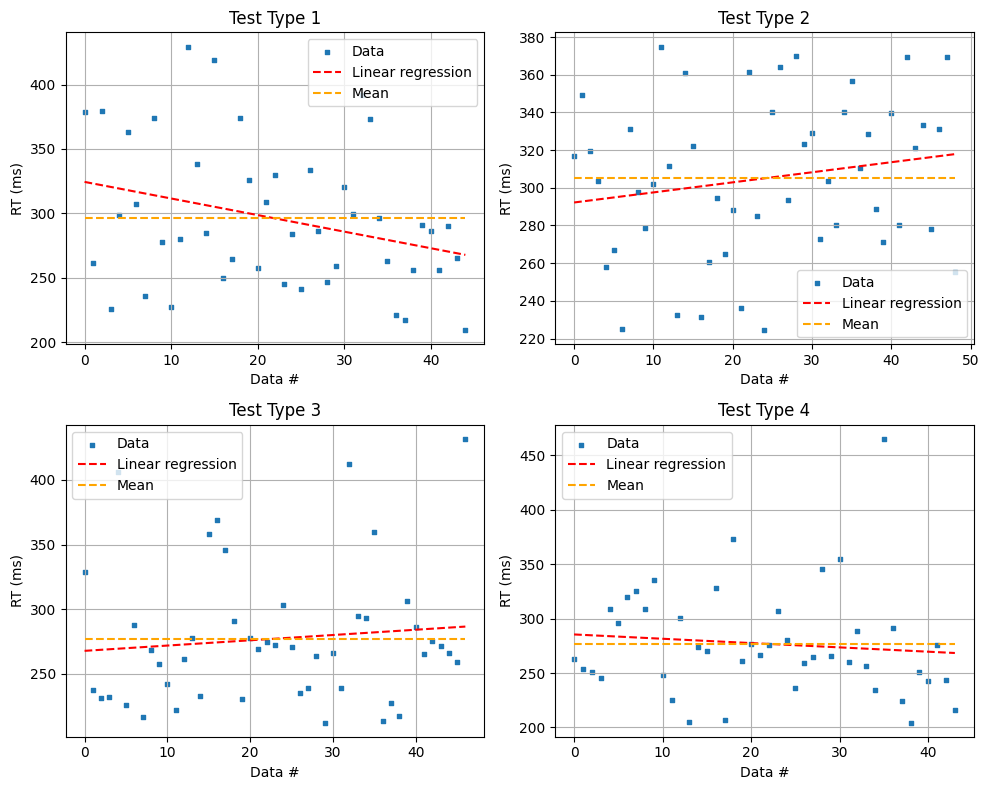

-------------------
Plotting subject features by type
Subject: Jul_13


<Figure size 1000x800 with 0 Axes>

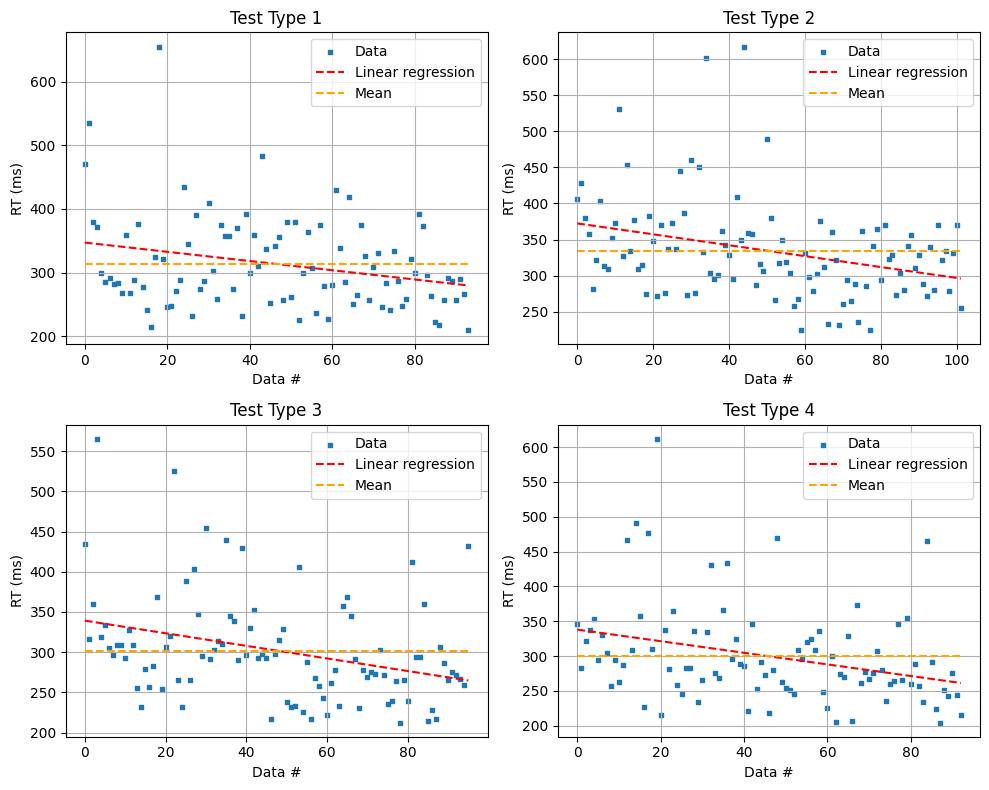

-------------------
Plotting overall features by type
Overall features by type


<Figure size 1000x800 with 0 Axes>

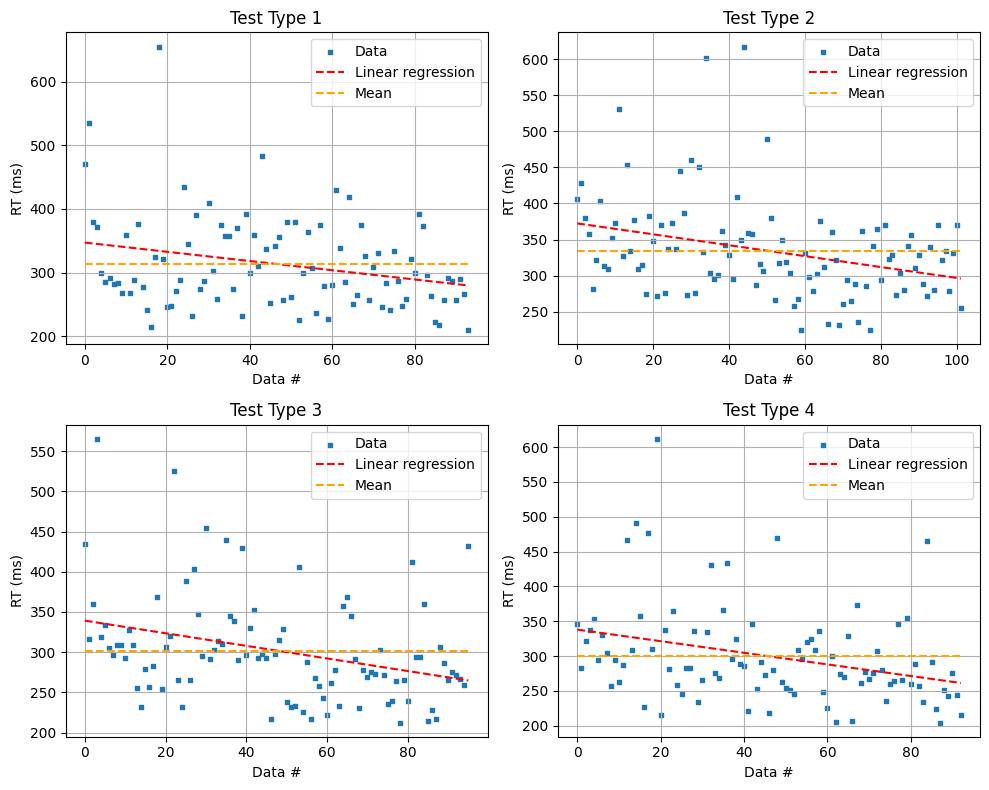

In [4]:
ft = Features(dataset, only_physiological=True)

# Single run features
print("--------------------")
print("Single run features")
print("--------------------")
# ft.calculate_single_run_features()
# ft.print_single_run_features()
ft.calculate_single_run_features_by_type(accelerometer=True)
ft.print_single_run_features_by_type()

# Subject features
print("--------------------")
print("Subject features")
print("--------------------")
# ft.calculate_subject_features()
# ft.print_subject_features()
ft.calculate_subject_features_by_type(accelerometer=True)
ft.print_subject_features_by_type()

# Overall features
print("--------------------")
print("Overall features")
print("--------------------")
# ft.calculate_overall_features()
# ft.print_overall_features()
ft.calculate_overall_features_by_type(accelerometer=True)
ft.print_overall_features_by_type()

# Plotting
fp = FeaturePlotter(ft)

print('Plotting single run features by type')
fp.plot_single_run_features_by_type()
print('-------------------')

print('Plotting subject features by type')
fp.plot_subject_features_by_type()
print('-------------------')

print('Plotting overall features by type')
fp.plot_overall_features_by_type()

## Save to csv

In [5]:
# Save the features to a CSV file in the current directory
# ft.save_all_to_csv('./Export/')

# Do the same analysis with the box data

In [6]:
box_data_dir = './Data/CompleteData/Test_box'

# List all files in the directory
files = os.listdir(box_data_dir)

# Filter out the .mat files
box_files = [file for file in files if file.endswith('.mat')]

print(box_files)

['Jul_13_Run1.mat', 'Jul_13_Run2.mat']


In [7]:
# Load the .mat files
box_dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
for file in box_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in box_dataset:
        box_dataset[code] = dict()
    if run not in box_dataset[code]:
        box_dataset[code][run] = dict()
    
    data = loadmat(os.path.join(box_data_dir, file))

    box_dataset[code][run] = data
    print(box_dataset[code][run].keys())
    print('-------------------')

for code in box_dataset:
    for run in box_dataset[code]:
        # Remove bad trials
        box_dataset[code][run]['test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['presstime']
        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['acc_test_type'][box_dataset[code][run]['rt_acc'] != 99]
        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['rt_acc'][box_dataset[code][run]['rt_acc'] != 99] * 1000


dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------


Subject: Jul_13
	Run 1:
		Test type 1:
			mean: 390.323 ms
			median: 370.962 ms
			std: 91.1061 ms
			min: 260.385 ms
			max: 634.766 ms
			normality: No
		Test type 2:
			mean: 385.261 ms
			median: 369.463 ms
			std: 70.9382 ms
			min: 291.155 ms
			max: 654.554 ms
			normality: No
		Test type 3:
			mean: 344.462 ms
			median: 334.027 ms
			std: 69.014 ms
			min: 229.463 ms
			max: 618.764 ms
			normality: No
		Test type 4:
			mean: 417.395 ms
			median: 410.722 ms
			std: 76.1046 ms
			min: 312.472 ms
			max: 589.419 ms
			normality: No
		Heterotopic over homotopic ratio: 1.05141
	Run 2:
		Test type 1:
			mean: 276.889 ms
			median: 276.04 ms
			std: 31.6632 ms
			min: 238.318 ms
			max: 357.446 ms
			normality: Yes
		Test type 2:
			mean: 342.205 ms
			median: 341.035 ms
			std: 46.942 ms
			min: 256.358 ms
			max: 448.534 ms
			normality: Yes
		Test type 3:
			mean: 306.998 ms
			median: 295.82 ms
			std: 47.9181 ms
			min: 211.099 ms
			max: 444.608 ms
			normality: No
		Test ty

<Figure size 1000x800 with 0 Axes>

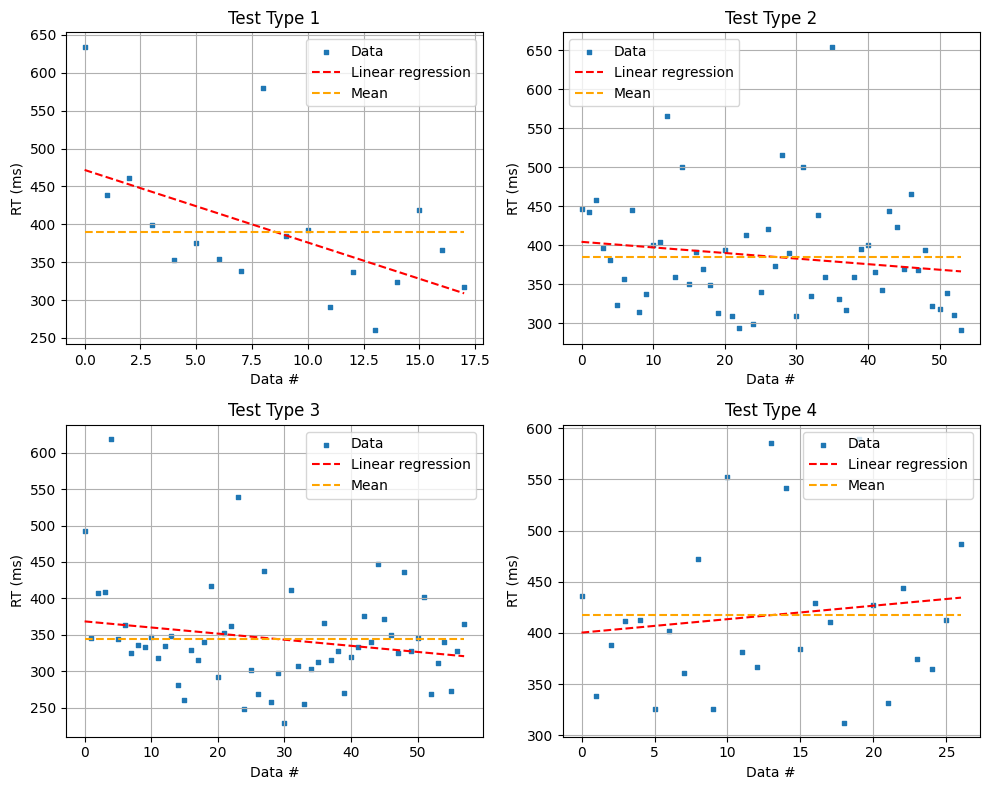

Subject: Jul_13, Run: 2


<Figure size 1000x800 with 0 Axes>

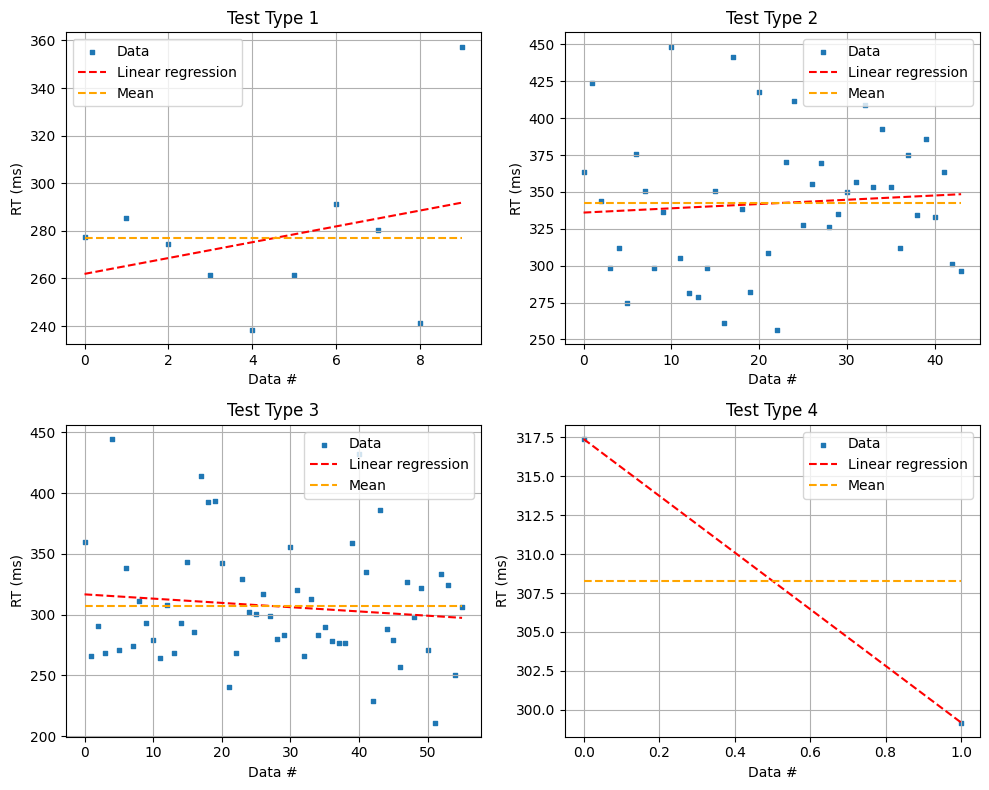

Subject: Jul_13


<Figure size 1000x800 with 0 Axes>

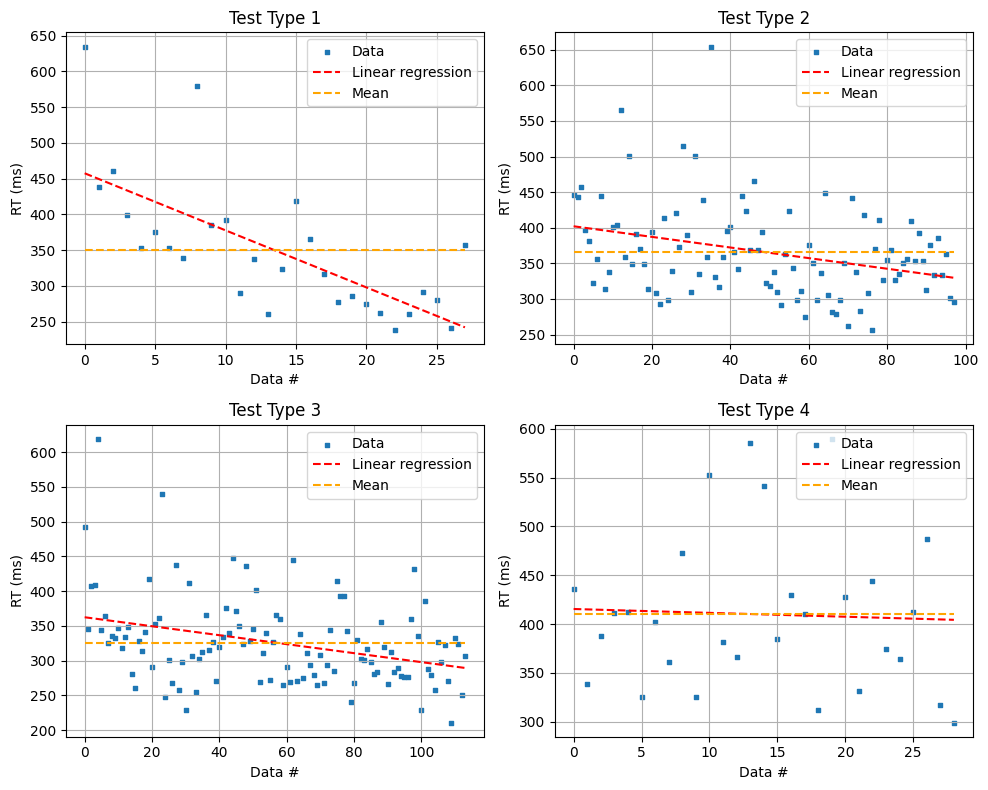

Overall features by type


<Figure size 1000x800 with 0 Axes>

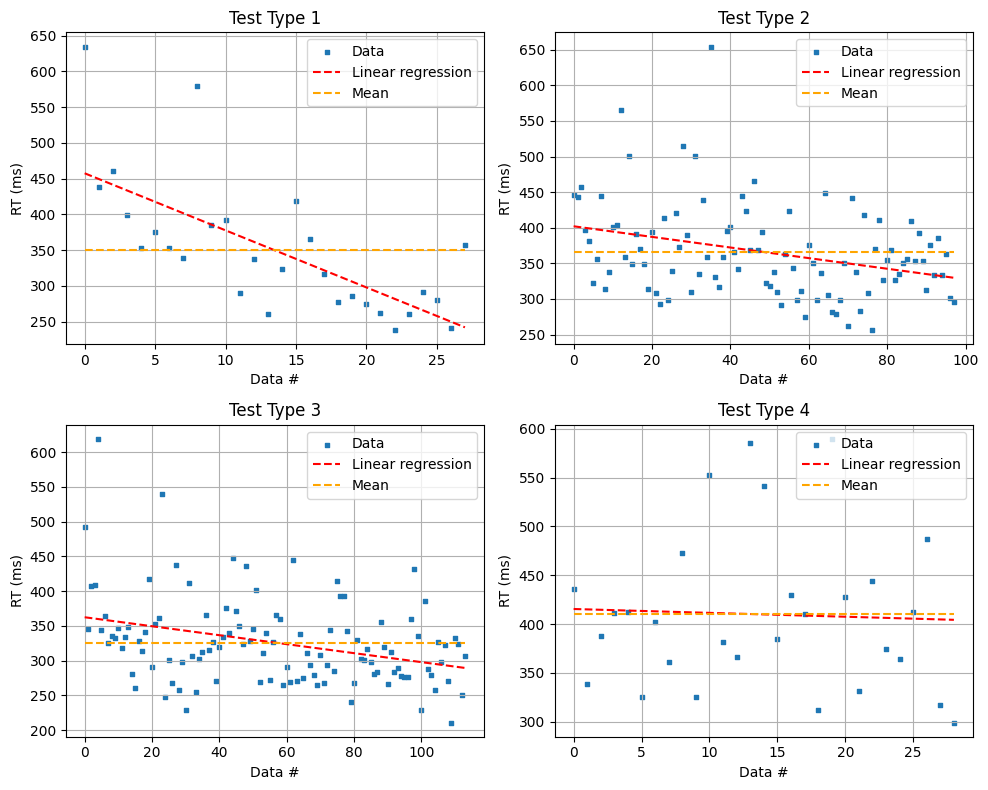

In [8]:
bft = Features(box_dataset, only_physiological=True)
# bft.calculate_single_run_features()
bft.calculate_single_run_features_by_type()
# bft.calculate_subject_features()
bft.calculate_subject_features_by_type()
# bft.calculate_overall_features()
bft.calculate_overall_features_by_type()

# bft.print_single_run_features()
bft.print_single_run_features_by_type()
# bft.print_subject_features()
bft.print_subject_features_by_type()
# bft.print_overall_features()
bft.print_overall_features_by_type()

bft_plotter = FeaturePlotter(bft)
bft_plotter.plot_single_run_features_by_type()
bft_plotter.plot_subject_features_by_type()
bft_plotter.plot_overall_features_by_type()

In [9]:
# Correlation matrix between the features

ftc = FeatureComparator(feature_1=ft, feature_2=bft)
ftc.compare_single_run_features_by_type()
ftc.compare_subject_features_by_type()
ftc.compare_overall_features_by_type()

Subject: Jul_13
	Run 2:
		Test type 1:
			mean: 296.145 (acc) ms vs 276.889 (box) ms
				difference: 19.2553 ms, Percentage difference: 6.95414%
			median: 286 (acc) ms vs 276.04 (box) ms
				difference: 9.96005 ms, Percentage difference: 3.60819%
			std: 55.5404 (acc) ms vs 31.6632 (box) ms
			min: 209.5 (acc) ms vs 238.318 (box) ms
			max: 429.5 (acc) ms vs 357.446 (box) ms
		Test type 2:
			mean: 305.041 (acc) ms vs 342.205 (box) ms
				difference: 37.1638 ms, Percentage difference: 10.8601%
			median: 303.5 (acc) ms vs 341.035 (box) ms
				difference: 37.535 ms, Percentage difference: 11.0062%
			std: 41.4601 (acc) ms vs 46.942 (box) ms
			min: 224.5 (acc) ms vs 256.358 (box) ms
			max: 375 (acc) ms vs 448.534 (box) ms
		Test type 3:
			mean: 277.256 (acc) ms vs 306.998 (box) ms
				difference: 29.7419 ms, Percentage difference: 9.688%
			median: 268.5 (acc) ms vs 295.82 (box) ms
				difference: 27.32 ms, Percentage difference: 9.23534%
			std: 52.7842 (acc) ms vs 47.9181 (box) ms


## Correlation test for rts

In [13]:
# from dtaidistance import dtw

# for subject in ftc.common_subjects:
#     print(f"Subject {subject}")
#     for test_type in ftc.feature_1.overall_features_by_type:
#         distance = dtw.distance(ftc.feature_1.subject_features_by_type[subject][test_type]['rt_acc'], ftc.feature_2.subject_features_by_type[subject][test_type]['rt_acc'])
#         print(f"\tDistance for test type {test_type}: {distance}")

for subject in ftc.common_subjects:
    print(f"Subject {subject}")
    for test_type in ftc.feature_2.overall_features_by_type:
        line_1 = ftc.feature_1.subject_features_by_type[subject][test_type]['rt_acc']
        line_2 = ftc.feature_2.subject_features_by_type[subject][test_type]['rt_acc']

        # Determine the maximum length
        max_length = max(len(line_1), len(line_2))

        # Pad both lines to the same length
        line_1_padded = np.pad(line_1, (0, max_length - len(line_1)), constant_values=np.nan)
        line_2_padded = np.pad(line_2, (0, max_length - len(line_2)), constant_values=np.nan)

        # Fit polynomials to the padded data (ignoring NaN during fit) >> fit not working

        valid_mask = ~np.isnan(line_1_padded) & ~np.isnan(line_2_padded)
        correlation_original = np.corrcoef(line_1_padded[valid_mask], line_2_padded[valid_mask])[0, 1]
        print(f"\tCorrelation for test type {test_type}: original data {correlation_original}")

        # plt.figure()
        # plt.plot(regression_1, label='Line 1')
        # plt.plot(regression_2, label='Line 2')


for subject in ftc.common_subjects:
    print(f"Subject {subject}")
    for run in ftc.common_runs[subject]:
        print(f"\tRun {run}")
        for test_type in ftc.feature_2.overall_features_by_type:
            line_1 = ftc.feature_1.single_run_features_by_type[subject][run][test_type]['rt_acc']
            line_2 = ftc.feature_2.single_run_features_by_type[subject][run][test_type]['rt_acc']

            # Determine the maximum length
            max_length = max(len(line_1), len(line_2))

            # Pad both lines to the same length
            line_1_padded = np.pad(line_1, (0, max_length - len(line_1)), constant_values=np.nan)
            line_2_padded = np.pad(line_2, (0, max_length - len(line_2)), constant_values=np.nan)

            valid_mask = ~np.isnan(line_1_padded) & ~np.isnan(line_2_padded)
            correlation_original = np.corrcoef(line_1_padded[valid_mask], line_2_padded[valid_mask])[0, 1]
            print(f"\tCorrelation for test type {test_type}: original data {correlation_original}")

# TODO: try to know where the RT is in time > get info from -1 and 90
# dtw: look for cutoff value
# permutation test for the RTs > 2 variables and n observation > resemblance between the two variables. One data series is shuffled


Subject Jul_13
	Correlation for test type 1: original data 0.20606065519058606
	Correlation for test type 2: original data 0.14507673207333407
	Correlation for test type 3: original data 0.1431262314755385
	Correlation for test type 4: original data 0.2959095279461566
Subject Jul_13
	Run 2
	Correlation for test type 1: original data -0.26306718218023956
	Correlation for test type 2: original data -0.06408918918225338
	Correlation for test type 3: original data 0.26650245379424153
	Correlation for test type 4: original data 1.0
	Run 1
	Correlation for test type 1: original data 0.4033629764262792
	Correlation for test type 2: original data -0.06322570717442781
	Correlation for test type 3: original data 0.0846221153496128
	Correlation for test type 4: original data 0.2980386272906406


## Permutation test for RTs

In [14]:
# import time

n_permutations = 10000#math.comb(len(rt_acc) + len(rt_box), len(rt_acc))

for subject in ftc.common_subjects:
    print(f"Subject {subject}")
    for test_type in ftc.feature_2.overall_features_by_type:
        rt_acc = ftc.feature_1.subject_features_by_type[subject][test_type]['rt_acc']
        rt_box = ftc.feature_2.subject_features_by_type[subject][test_type]['rt_acc']

        # Remove NaN values to handle missing data
        rt_acc = np.array(rt_acc)
        rt_box = np.array(rt_box)
        rt_acc = rt_acc[~np.isnan(rt_acc)]
        rt_box = rt_box[~np.isnan(rt_box)]

        # Combine the two datasets
        combined_data = np.concatenate([rt_acc, rt_box])
        observed_difference = np.mean(rt_acc) - np.mean(rt_box)

        # Permutation test
        permuted_differences = []
        for _ in range(n_permutations):
            # Shuffle the combined data
            permuted_data = np.random.permutation(combined_data)
            # Split into two groups
            perm_rt_acc = permuted_data[:len(rt_acc)]
            perm_rt_box = permuted_data[len(rt_acc):]
            # Compute the mean difference
            permuted_difference = np.mean(perm_rt_acc) - np.mean(perm_rt_box)
            permuted_differences.append(permuted_difference)

        # Convert to a numpy array
        permuted_differences = np.array(permuted_differences)

        # Compute the p-value
        p_value = np.sum(np.abs(permuted_differences) >= np.abs(observed_difference)) / n_permutations

        print(f"\tTest type {test_type}: observed difference = {observed_difference:.3f}, p-value = {p_value:.6f}")

# All lower than 0.05, so we can reject the null hypothesis that the two datasets are the same. In fact, rt_box > rt_acc

Subject Jul_13
	Test type 1: observed difference = -36.465, p-value = 0.036200
	Test type 2: observed difference = -31.841, p-value = 0.001400
	Test type 3: observed difference = -24.074, p-value = 0.007900
	Test type 4: observed difference = -110.262, p-value = 0.000000


## Permutation test on the correlation

Correlation > check if they follow the same trend

Permutation > checks whether the observed correlation (or similarity in trends) between the two datasets is significantly different from what would be expected by chance.

Subject Jul_13
	Test type 1: Observed correlation: 0.206. P-value: 0.288. The trends are not significantly different.
	Test type 2: Observed correlation: 0.145. P-value: 0.149. The trends are not significantly different.
	Test type 3: Observed correlation: 0.143. P-value: 0.163. The trends are not significantly different.
	Test type 4: Observed correlation: 0.296. P-value: 0.120. The trends are not significantly different.


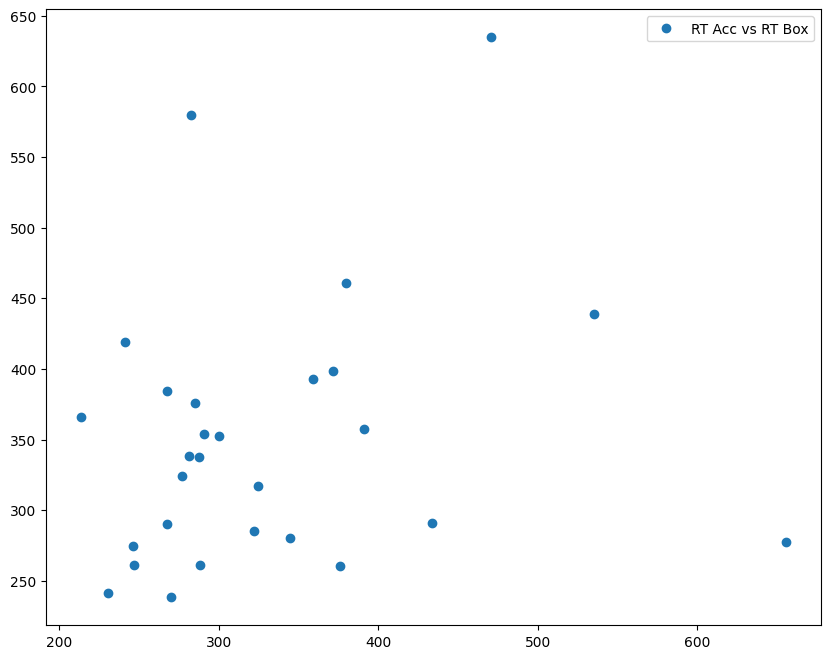

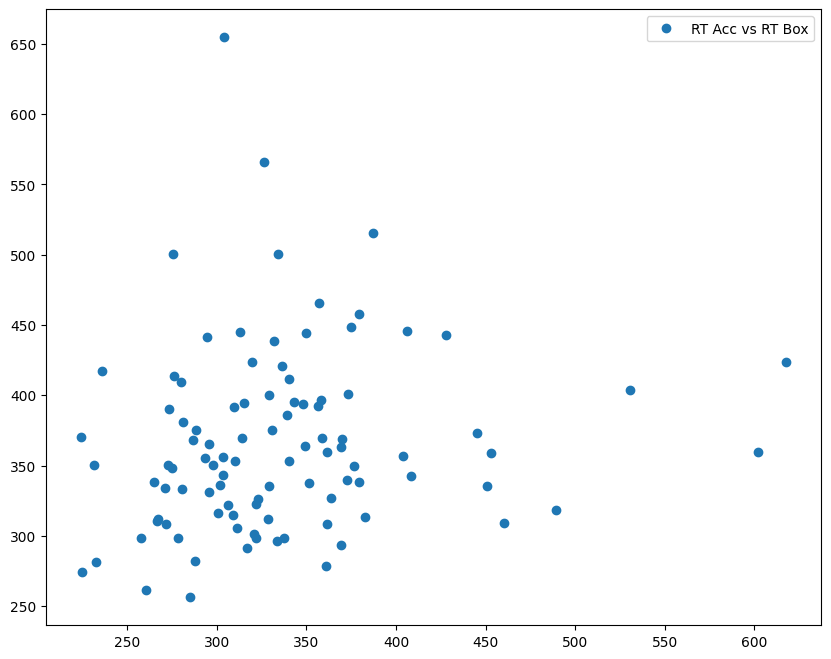

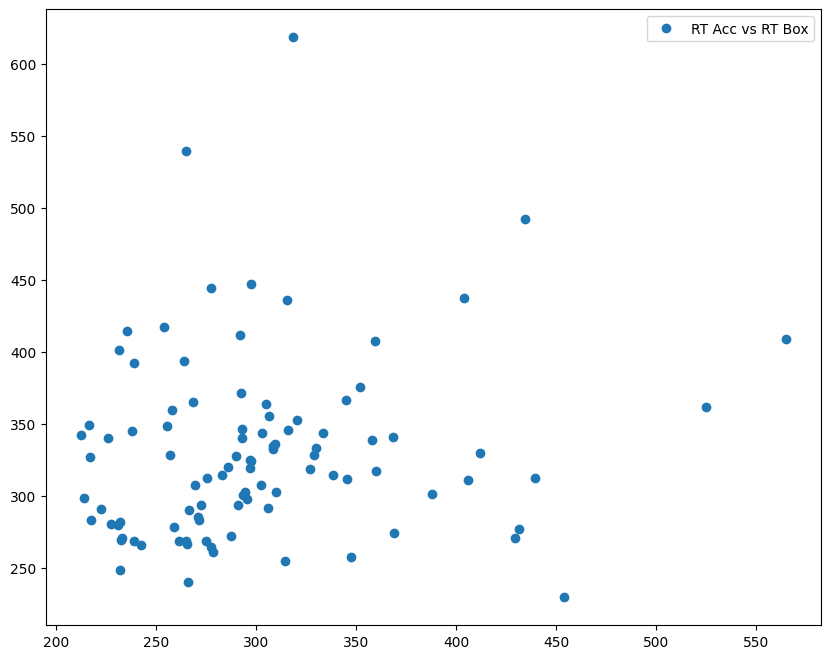

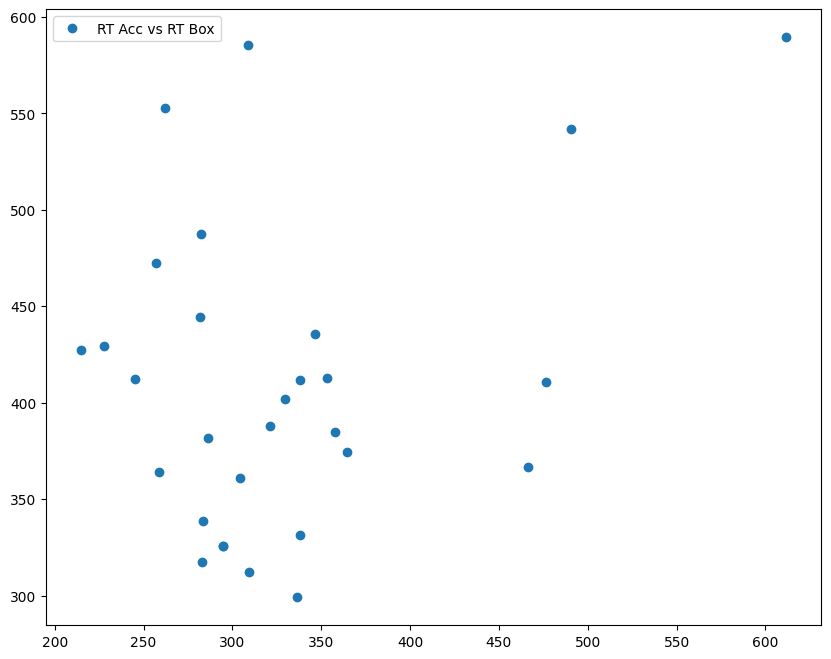

In [18]:
for subject in ftc.common_subjects:
    print(f"Subject {subject}")
    for test_type in ftc.feature_2.overall_features_by_type:
        rt_acc = ftc.feature_1.subject_features_by_type[subject][test_type]['rt_acc']
        rt_box = ftc.feature_2.subject_features_by_type[subject][test_type]['rt_acc']

        # Remove NaN values to handle missing data
        rt_acc = np.array(rt_acc)
        rt_box = np.array(rt_box)
        rt_acc = rt_acc[~np.isnan(rt_acc)]
        rt_box = rt_box[~np.isnan(rt_box)]

        rt_box_truncated = rt_box
        rt_acc_truncated = rt_acc

        # Ensure both arrays have the same length
        min_length = min(len(rt_acc_truncated), len(rt_box_truncated))
        rt_acc_truncated = rt_acc_truncated[:min_length]
        rt_box_truncated = rt_box_truncated[:min_length]

        plt.figure()
        plt.plot(rt_acc_truncated, rt_box_truncated, 'o',label='RT Acc vs RT Box')
        plt.legend()

        # Compute the observed correlation
        observed_correlation = np.corrcoef(rt_acc_truncated, rt_box_truncated)[0, 1]

        # Combine datasets and prepare for permutation
        combined_data = np.concatenate([rt_acc_truncated, rt_box_truncated])
        n_rt_acc = len(rt_acc_truncated)
        n_permutations = 10000  # Number of permutations

        # Perform permutations
        permuted_correlations = []
        for _ in range(n_permutations):
            np.random.shuffle(combined_data)
            perm_rt_acc = combined_data[:n_rt_acc]
            perm_rt_box = combined_data[n_rt_acc:]
            permuted_correlation = np.corrcoef(perm_rt_acc, perm_rt_box)[0, 1]
            permuted_correlations.append(permuted_correlation)

        p_value = np.mean(np.abs(permuted_correlations) >= np.abs(observed_correlation))

        if p_value < 0.05:
            print(f"\tTest type {test_type}: Observed correlation: {observed_correlation:.3f}. P-value: {p_value::.3f}. The trends are significantly different. ")
        else:
            print(f"\tTest type {test_type}: Observed correlation: {observed_correlation:.3f}. P-value: {p_value:.3f}. The trends are not significantly different.")